# Exercise 5. ICT Project: Communication Services and Security
#### César Fernández Camón

#### Authors:
- Albert Pérez Datsira

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad

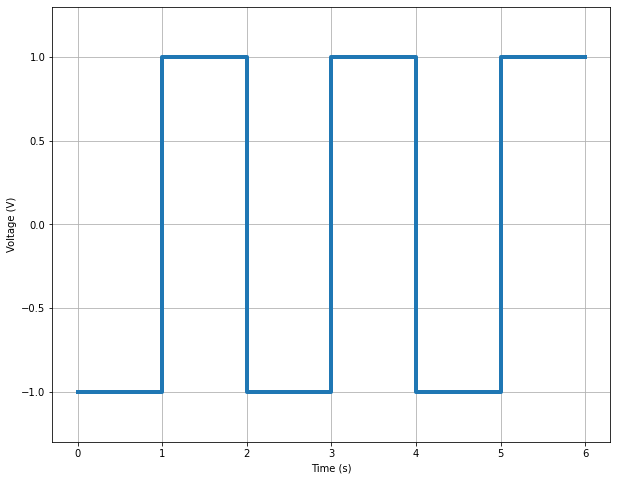

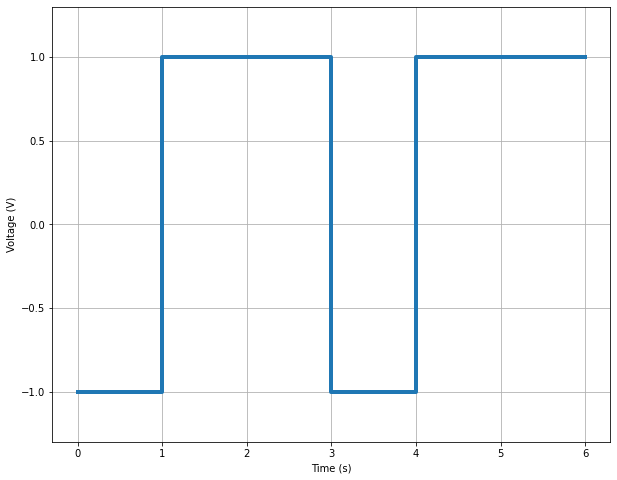

In [79]:
def plot_signal(values, title):
    x = np.arange(0, 7)
    y = np.array(values)
    plt.figure(figsize=(10, 8))
    plt.step(x, y, linewidth=4, label='Signal')
    #plt.title(title, fontweight='bold')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.grid()
    plt.ylim(-1.3, 1.3)
    #plt.legend()
    plt.show()

plot_signal([-1, -1, 1, -1, 1, -1, 1], "Periodic signal (101010...)")
plot_signal([-1, -1, 1, 1, -1, 1, 1], "Periodic signal (100100...)")

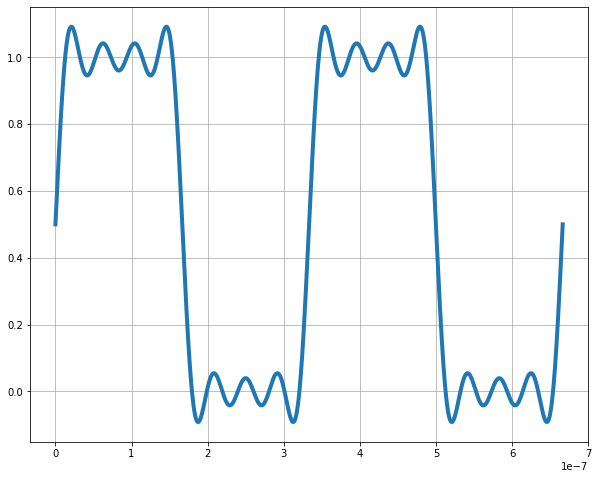

In [83]:
def cosinus(t, T, n, d=1):
  return np.cos(2*np.pi*n*t/T/d) 

def sinus(t, T, n, d=1):
  return np.sin(2*np.pi*n*t/T/d)

def cosIntegral(t, T, n, period):
  return (2/T) * quad(cosinus, 0, T/period, args=(T, n))[0]
    
def sinIntegral(t, T, n, period):
  return (2/T) * quad(sinus, 0, T/period, args=(T, n))[0]

def fourrier(t, T, n, period):
  return (cosinus(t, T, n) * cosIntegral(t, T, n, period) + 
          sinus(t, T, n) * sinIntegral(t, T, n, period))


transmissionRate = 6*10**(6)
Tb = 1/transmissionRate
Ts = 2*Tb

T1 = 1/3 * 10 ** (-6)
y = 0.5

period = 2

t = np.linspace(0, Ts*2, 10000)

for n in range(1, 8):
    y +=fourrier(t, T1, n, period)

plt.figure(figsize=(10, 8))
plt.plot(t, y, linewidth=4)
plt.grid()
plt.show()